## Banco de dados DATASET11 - Bearing Classification

### Importação de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.signal import iirnotch
import scipy.io

### Carregamento de arquivos

In [2]:

letters = ['H', 'I', 'O'] # 0-healthy, I-inner fault, O-outer fault
# letters = ['H']
speeds = ['A', 'B', 'C', 'D']
# speeds = ['A']
trials = ['1','2', '3']
# trials = ['1']
state = 0
dataset = []
for letter in letters:
    for speed in speeds:
        for trial in trials:
            path_signal = f'../../Dados/Rotor_Bearing/Dataset11/Data/{letter}-{speed}-{trial}.mat'
            df_signal = scipy.io.loadmat(path_signal)
            channel_1 = df_signal['Channel_1'].flatten()
            # channel_2 = df_signal['Channel_2'].flatten()
            signal = []
            signal.append([channel_1, state])
            dataset.append(signal)
    state +=1

In [3]:
data = []
X=[]
y=[]
for i in dataset:
    data.append(i[0])

for i in data:
    X.append(i[0])
    y.append(i[1])

In [4]:
dataset[0][0][0] ##Channel_1 amostra 0

array([-0.00219944, -0.0018706 , -0.00154175, ...,  0.00963905,
        0.0093102 ,  0.00898136])

##### Visualização dos sinais

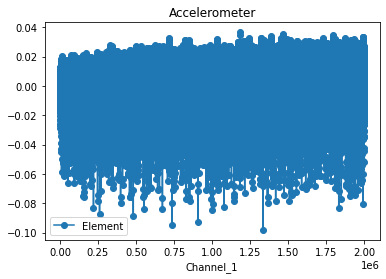

In [5]:
# Create a new figure for each element
plt.figure()

# Plot the data
plt.plot(dataset[0][0][0], marker='o', linestyle='-', label=f'Element')
plt.rcParams['agg.path.chunksize'] = 10000

# Customize plot (add title, labels, legend, etc. as needed)
plt.title(f'Accelerometer')
plt.xlabel('Channel_1')
plt.legend()

# Show or save the figure
# plt.show()  # Uncomment this line to display figures interactively
# plt.savefig(f'element_{idx + 1}_plot.png')  # Save figures to files

# Show the plots (if not saving to files)
# plt.savefig('teste.png')


### Tratamento dos dados em vetores de entrada

### Aplicação de técnicas de processamento de sinais - Cálculos estatísticos

--------------------------------------------------------

#### Time-Domain Features

##### Skewness

In [6]:
from scipy.stats import skew

def get_skewness(signal):
    return skew(signal)

##### Kurtosis

In [7]:
from scipy.stats import kurtosis

def get_kurtosis(signal):
    return kurtosis(signal)

##### Shape Factor

In [8]:
def get_shape_factor(signal):
    N = len(signal)
    return np.sqrt(((signal**2).sum()/N) / ((abs(signal)).sum()/N))

##### Variation

In [9]:
import statistics

def get_variance(signal):
    return statistics.variance(signal)

##### Standard Deviation

In [10]:
def get_std(signal):
    return statistics.stdev(signal)

##### RMS

In [11]:
def get_rms_acceleration(signal):
    N = len(signal)
    return np.sqrt(1/N * (signal**2).sum())

##### Peak-to-Peak

In [12]:
def get_peak_acceleration(signal):
    return max(abs(signal))

##### Crest Factor

In [13]:
def get_crest_factor(signal):
    return get_peak_acceleration(signal)/get_rms_acceleration(signal)

-----------------------------------------------------------------------------------

#### Frequency-Domain Features

In [14]:
def get_frequency_centre(signal):
    return ((signal.diff()*signal).sum()) / (2 * np.pi * np.sum(signal**2))
def get_mean_square_frequency(signal):
    return  np.sum(signal.diff()**2) / (4 * np.pi**2 * np.sum(signal**2))
def get_root_mean_square_frequency(signal):
    return  np.sqrt(get_mean_square_frequency(signal))
def get_root_variance_frequency(signal):
    return  np.sqrt(get_mean_square_frequency(signal) - get_frequency_centre(signal)**2)

------------------------------------------------------------------------------------

#### Time-Frequency Domain

##### Estimate power spectral density using Welch’s method.


##### Power Spectral Density (PSD)

##### Função de Densidade de Probabilidade (PDF). - cálculo de skewness e kurtosis

---------------------------------------------------------------------------------------

In [23]:
features_function = [get_skewness, get_kurtosis, get_shape_factor, get_variance, get_std, get_rms_acceleration, 
                          get_peak_acceleration,
                          get_crest_factor, get_frequency_centre, get_mean_square_frequency, get_root_mean_square_frequency, 
                          get_root_variance_frequency]

list_features_function = features_function[0:2]

list_features_function

[<function __main__.get_skewness(signal)>,
 <function __main__.get_kurtosis(signal)>]

In [16]:
from itertools import combinations

features_function = [get_skewness, get_kurtosis, get_shape_factor, get_variance, get_std, get_rms_acceleration,
                     get_peak_acceleration, get_crest_factor, get_frequency_centre, get_mean_square_frequency,
                     get_root_mean_square_frequency, get_root_variance_frequency]

list_features_function = []

# Iterate over different sizes of combinations
for r in range(1, len(features_function) + 1):
    # Generate all combinations of size r
    combinations_r = combinations(features_function, r)
    
    # Extend the list with each combination
    list_features_function.extend(combinations_r)

# Convert combinations to lists for printing
list_features_function = [list(combination) for combination in list_features_function]

# Print all combinations
# Print all combinations with indices
for index, combination in enumerate(list_features_function):
    print(f"Index {index}: {combination}")
    for i in combination:
        print(type(i))

Index 0: [<function get_skewness at 0x0000028B89A62B80>]
<class 'function'>
Index 1: [<function get_kurtosis at 0x0000028B89A629D0>]
<class 'function'>
Index 2: [<function get_shape_factor at 0x0000028B89A628B0>]
<class 'function'>
Index 3: [<function get_variance at 0x0000028B89A62E50>]
<class 'function'>
Index 4: [<function get_std at 0x0000028B89A79C10>]
<class 'function'>
Index 5: [<function get_rms_acceleration at 0x0000028B89A79DC0>]
<class 'function'>
Index 6: [<function get_peak_acceleration at 0x0000028B89A79CA0>]
<class 'function'>
Index 7: [<function get_crest_factor at 0x0000028B89A79F70>]
<class 'function'>
Index 8: [<function get_frequency_centre at 0x0000028B89A56CA0>]
<class 'function'>
Index 9: [<function get_mean_square_frequency at 0x0000028B89A79E50>]
<class 'function'>
Index 10: [<function get_root_mean_square_frequency at 0x0000028B89A79EE0>]
<class 'function'>
Index 11: [<function get_root_variance_frequency at 0x0000028B89A81040>]
<class 'function'>
Index 12: [<

In [17]:
experiments_ids = list(range(0,len(dataset)))

In [22]:
dataset[35][0][1]

2

In [24]:
data_features = []
i = 0
for exp in experiments_ids:
    experiment = dataset[exp][0][0]
    feature_accelerometer = []

    for func in list_features_function:
        
        accelerometer = func(dataset[exp][0][0])

        if type(accelerometer) == list:
            feature_accelerometer+=accelerometer
            
        else:
            feature_accelerometer.append(accelerometer)

    
    data_features.append([feature_accelerometer, [dataset[exp][0][1]]])

In [25]:
len(data_features)

36

In [26]:
features_list = list()

for i in data_features:
    y = np.concatenate([np.array(x) for x in i])
    features_list.append(y)

features_list = np.array(features_list)
len(features_list[:, 1])

36

### Aplicação de técnicas de inteligência artificial

In [27]:
features_list

array([[-0.32475027,  2.38600824,  0.        ],
       [-0.22270423,  1.97591857,  0.        ],
       [-0.24821756,  1.90705644,  0.        ],
       [-0.21434363,  1.81587095,  0.        ],
       [-0.35089627,  3.11674075,  0.        ],
       [-0.1675782 ,  1.76874976,  0.        ],
       [-0.24321569,  1.85683692,  0.        ],
       [-0.29164404,  2.16175847,  0.        ],
       [-0.26069383,  1.96637944,  0.        ],
       [-0.34223142,  2.57709578,  0.        ],
       [-0.35048064,  2.68920142,  0.        ],
       [-0.03419698,  1.54215821,  0.        ],
       [-0.81296965, 11.67626118,  1.        ],
       [-0.18811017, 20.26228654,  1.        ],
       [-0.05763012, 16.90026217,  1.        ],
       [-0.14315521, 24.94852721,  1.        ],
       [-0.12711404, 20.45604066,  1.        ],
       [-0.1111008 , 23.68181163,  1.        ],
       [-0.08968942, 18.63451227,  1.        ],
       [-0.08091848, 18.14555648,  1.        ],
       [-0.03867784, 14.73136144,  1.   

In [28]:
## Kohonen Map (clusterizacao) - 1º - unsupervised
from sklearn_som.som import SOM

index = 1

dim_ = 2*1+1

iris_som = SOM(n=1,m=3,dim=dim_, max_iter=100000) 
iris_som.fit(features_list)
predictions = iris_som.predict(features_list)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [38]:
labels = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
predictions = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Check if values match for each index
matches = [label == pred for label, pred in zip(labels, predictions)]
# accuracy = np.mean(np.array(matches))*100

# print(f'Acc: {accuracy:.2f}%')

[True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


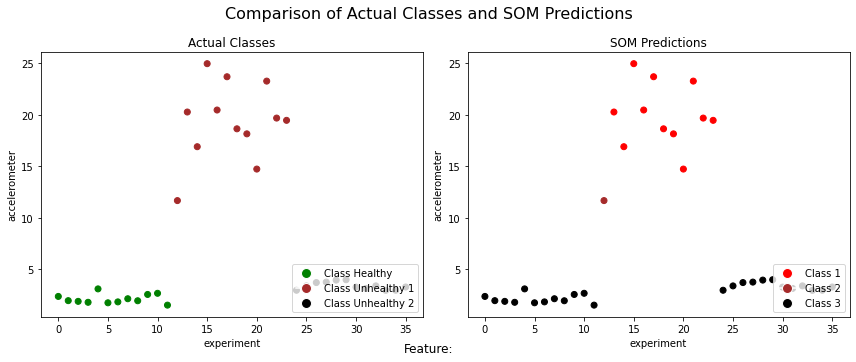

In [132]:
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

# Assuming you have the necessary data and features_list defined

# Create a 1x2 subplot grid
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

index1 = 1

# Extract features
x = list(range(0,36))
y = features_list[:, index1]
label = features_list[:, -1]

# Plot the first subplot (Actual Classes)
scatter1 = axs[0].scatter(x, y, c=label, cmap=ListedColormap(['green', 'brown', 'black']))
axs[0].set_title('Actual Classes')
axs[0].set_xlabel(f'experiment')  # Add X axis label
axs[0].set_ylabel(f'accelerometer')  # Add Y axis label
classes = ['Healthy', 'Unhealthy 1', 'Unhealthy 2']

# Create a custom legend
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'Class {classes[i]}',
                            markerfacecolor=['green', 'brown', 'black'][i], markersize=10) for i in range(3)]

# Add legend to the first subplot
axs[0].legend(handles=legend_elements1, loc='lower right')

# Plot the second subplot (SOM Predictions)
scatter2 = axs[1].scatter(x, y, c=predictions, cmap=ListedColormap(['red', 'brown', 'black']))
axs[1].set_title('SOM Predictions')
axs[1].set_xlabel(f'experiment')  # Add X axis label
axs[1].set_ylabel(f'accelerometer')  # Add Y axis label
classes = ['1', '2', '3']

# Create a custom legend
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Class {classes[i]}',
                            markerfacecolor=['red', 'brown', 'black'][i], markersize=10) for i in range(3)]

# Add legend to the second subplot
axs[1].legend(handles=legend_elements2, loc='lower right')

# Set a global title for the entire figure
fig.suptitle(f'Comparison of Actual Classes and SOM Predictions', fontsize=16)

# Add a subtitle below the subplots
fig.text(0.5, 0.02, f'Feature:', ha='center', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure
# plt.savefig(f'image_{functions}.png')

# Show the plots
plt.show()

In [30]:
## MLP (classificacao) - supervised
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

X = features_list[:,0:2]
y = features_list[:,-1]

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Create an MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(10,30,30,10), max_iter=1000, random_state=42)

# Fit the classifier to the training data
mlp_classifier.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred = mlp_classifier.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_classification_rep = classification_report(y_val, y_val_pred)

# Print the validation results
print("Validation Results:")
print(f"Accuracy: {val_accuracy}")
print("Classification Report:\n", val_classification_rep)

# Make predictions on the testing data
y_test_pred = mlp_classifier.predict(X_test)

# Evaluate the model on the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

# Print the testing results
print("\nTesting Results:")
print(f"Accuracy: {test_accuracy}")
print("Classification Report:\n", test_classification_rep)

Validation Results:
Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      1.00      0.67         1
         1.0       1.00      0.67      0.80         3
         2.0       1.00      1.00      1.00         1

    accuracy                           0.80         5
   macro avg       0.83      0.89      0.82         5
weighted avg       0.90      0.80      0.81         5


Testing Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       1.00      1.00      1.00         2
         2.0       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [31]:
## SVM (classificacao) - supervised
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM model
svm_model = SVC(kernel='linear')

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%
